# 분포 (Distributions)

이전 장에서는 베이즈 정리를 사용하여 쿠키 문제를 해결한 후, 베이즈 테이블을 사용하여 다시 한 번 문제를 해결했습니다.  
이번 장에서는 여러분의 인내심을 시험할 위험을 무릅쓰고, "확률 질량 함수 (probability mass function)"를 나타내는 `Pmf` 객체를 사용하여 한 번 더 문제를 해결해 보겠습니다.  
`Pmf`가 무엇을 의미하는지, 그리고 베이즈 통계에 왜 유용한지 설명드리겠습니다.

`Pmf` 객체를 사용하여 더 어려운 문제를 해결하고 베이즈 통계로 한 걸음 더 나아가 보겠습니다.  
하지만 먼저 분포에 대해 살펴보겠습니다.

## 분포

통계에서 **분포**란 가능한 결과의 집합과 각 결과에 대응하는 확률을 의미합니다.  
예를 들어, 동전을 던질 때 두 가지 가능한 결과가 있으며, 그 확률은 거의 동일합니다.  
6면체 주사위를 굴리면 가능한 결과의 집합은 1부터 6까지의 숫자이며, 각 결과에 대응하는 확률은 1/6입니다.

분포를 나타내기 위해 `empiricaldist`라는 라이브러리를 사용할 것입니다. "경험적 (empirical)" 분포란 이론적 분포와 달리 데이터를 기반으로 한 분포를 의미합니다.  
이 책 전체에서 이 라이브러리를 사용할 예정입니다. 이번 장에서 기본 기능을 소개하고, 이후에 추가 기능을 살펴보겠습니다.

> **분포**는 "어떤 일이 일어날 가능성이 어떻게 퍼져 있는지"를 보여주는 거야.
> 
> 예를 들어, 동전을 던질 때 앞면이 나올 수도 있고 뒷면이 나올 수도 있지? 두 가지 경우가 있는데, 둘 다 나올 확률이 비슷해! 그래서 동전 던지기의 분포는 앞면과 뒷면이 나올 확률이 같은 모양이지.
> 
> 또 주사위를 던지면 1부터 6까지 숫자가 나올 수 있어. 각 숫자가 나올 가능성도 똑같아! 그래서 주사위 던지기의 분포는 1, 2, 3, 4, 5, 6이 각각 나올 확률이 같은 모양이야.
> 
> 분포는 어떤 일이 일어날 수 있는지, 그 일이 일어날 가능성이 얼마나 되는지를 보여줘서 무척 유용해!


## 확률 질량 함수 (Probability Mass Functions)

분포의 결과가 이산적일 경우, 우리는 **확률 질량 함수** 또는 PMF를 사용하여 분포를 설명할 수 있습니다. PMF는 각 가능한 결과를 그 확률에 대응시키는 함수입니다.

`empiricaldist` 라이브러리는 확률 질량 함수를 나타내는 `Pmf`라는 클래스를 제공합니다.  
`Pmf`를 사용하려면 다음과 같이 불러올 수 있습니다:



> **확률 질량 함수**는 "각각의 결과가 나올 가능성을 정리해 놓은 것"이야. 아주 쉬운 예를 들어볼게!
> 
> 예를 들어, 동전을 던지면 앞면이 나올 수도 있고, 뒷면이 나올 수도 있지? 이 확률 질량 함수는 "앞면이 나올 가능성은 50%, 뒷면이 나올 가능성도 50%"라고 정리해주는 거야.
> 
> 주사위를 던졌다고 생각해보자. 주사위에는 1부터 6까지 숫자가 있지? 확률 질량 함수는 "1이 나올 가능성은 1/6, 2가 나올 가능성도 1/6" 이렇게 모든 숫자에 대해 가능성을 보여줘!
> 
> 그래서, 확률 질량 함수는 "각각의 일이 일어날 가능성"을 간단하게 볼 수 있도록 도와주는 표 같은 거라고 생각하면 돼!

### empirical distribution

Pmf는 아무 결과도 없는 빈 Pmf 객체를 생성합니다.
그런 다음 대괄호 연산자를 사용하여 새로운 결과를 추가할 수 있습니다.
이 예에서는 두 가지 결과를 문자열로 나타내며, 둘 다 동일한 확률인 0.5를 가지고 있습니다.

In [2]:
from empiricaldist import Pmf

coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


가능한 결과의 시퀀스를 사용하여 Pmf를 생성할 수도 있습니다.

다음 예제에서는 Pmf.from_seq를 사용하여 6면체 주사위를 나타내는 Pmf를 만듭니다.

In [3]:
die = Pmf.from_seq(range(1, 7))
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


이 예제에서는 시퀀스 내의 모든 결과가 한 번씩만 나타나므로, 각 결과의 확률은 모두 $1/6$입니다.

더 일반적으로, 다음 예제와 같이 결과가 여러 번 나타날 수도 있습니다.

In [4]:
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


문자 M은 11개의 문자 중 한 번 나타나므로, 그 확률은 $1/11$입니다.
문자 i는 4번 나타나므로 그 확률은 $4/11$입니다.

문자열의 문자는 무작위 과정의 결과가 아니므로, Pmf에서 문자를 "결과" 대신 **일반적인 용어인 "수량 (quantities)"**으로 표현하겠습니다.

Pmf 클래스는 Pandas의 Series를 상속하므로, Series로 할 수 있는 작업은 Pmf로도 모두 가능합니다.

예를 들어, 대괄호 연산자를 사용하여 특정 수량을 조회하고 그에 대응하는 확률을 얻을 수 있습니다.

In [5]:
letters['s']

0.36363636363636365

In [6]:
letters('s')

0.36363636363636365

In [7]:
letters('x')

0

In [8]:
die([1, 4, 7])

array([0.16666667, 0.16666667, 0.        ])

Pmf에 있는 수량은 문자열, 숫자 또는 Pandas Series의 인덱스에 저장될 수 있는 다른 유형의 값이 될 수 있습니다.
Pandas에 익숙하다면 Pmf 객체를 다루는 데 도움이 될 것입니다.
하지만 필요할 때마다 설명을 추가로 제공하겠습니다.


## 쿠키 문제 다시 보기

이 섹션에서는 `Pmf`를 사용하여 이전 장에서 다룬 쿠키 문제를 해결해 보겠습니다.  
문제는 다음과 같습니다:

> 두 개의 쿠키 그릇이 있다고 가정해 봅시다.
>
> * 1번 그릇에는 바닐라 쿠키 30개와 초콜릿 쿠키 10개가 있습니다.
>
> * 2번 그릇에는 바닐라 쿠키 20개와 초콜릿 쿠키 20개가 있습니다.
>
> 이제 두 그릇 중 하나를 무작위로 선택하고, 보지 않고 무작위로 쿠키를 하나 선택했다고 가정합시다. 선택한 쿠키가 바닐라 쿠키라면, 그 쿠키가 1번 그릇에서 나온 확률은 얼마일까요?

다음은 두 가지 가설과 그에 대한 사전 확률을 나타내는 `Pmf`입니다.


* $B_1$ : 바닐라 $V$ 30개, 초코 $C$ 10개 
* $B_2$ : 바닐라 $V$ 20개, 초코 $C$ 10개

**사전 분포**

In [9]:
prior = Pmf.from_seq(['B1', 'B2'])
prior

,probs
B1,0.5
B2,0.5



각 가설에 대한 사전 확률을 포함하는 이 분포를 **사전 분포**라고 합니다.

새로운 데이터(바닐라 쿠키)를 기반으로 분포를 갱신하기 위해 사전 확률에 우도를 곱합니다.  
1번 그릇에서 바닐라 쿠키를 뽑을 우도는 `3/4`이고, 2번 그릇의 우도는 `1/2`입니다.


> **우도**
> 
> 우도는 "어떤 일이 얼마나 잘 맞는지"를 알려주는 거야. 예를 들어, 너가 쿠키가 든 두 개의 그릇을 가지고 있는데, 하나는 바닐라 쿠키가 많고, 다른 하나는 바닐라 쿠키가 적어.
> 
> 지금 손에 바닐라 쿠키가 있다면, 어떤 그릇에서 그 쿠키가 나왔을 가능성이 더 높을까? 하고 생각해볼 수 있지. 바닐라 쿠키가 더 많이 들어 있는 그릇이 더 잘 맞겠지?
> 
> 이런 식으로, 우도는 "이 쿠키가 이 그릇에서 나왔을 가능성이 얼마나 될까?"를 알려줘.

In [10]:
likelihood_vanilla = [3/4, 1/2]

posterior = prior * likelihood_vanilla # 바닐라를 뽑은 경우 업데이트
posterior

,probs
B1,0.375
B2,0.250


이 결과는 정규화되지 않은 사후 확률입니다. 즉, 이 값들의 합이 1이 아닙니다.
이 값들이 1이 되도록 합계를 맞추려면, Pmf에서 제공하는 normalize 메서드를 사용할 수 있습니다.

posterior distribution

In [11]:
posterior.normalize()

0.625

normalize의 반환값은 데이터의 총 확률로, $5/8$입니다.

각 가설에 대한 사후 확률을 포함하는 posterior는 사후 분포라고 불립니다.

In [12]:
posterior

,probs
B1,0.6
B2,0.4


사후 분포에서 1번 그릇에 대한 사후 확률을 선택할 수 있습니다.

In [13]:
posterior('B1')

0.6

답은 0.6입니다.

`Pmf` 객체를 사용하면 더 많은 데이터를 가지고 연속적인 업데이트를 쉽게 할 수 있다는 장점이 있습니다.  
예를 들어, 첫 번째 쿠키를 다시 넣고 (그래서 그릇의 내용물은 변하지 않습니다) 같은 그릇에서 다시 하나를 뽑았다고 가정해봅시다.  
두 번째 쿠키도 바닐라라면, 다음과 같이 두 번째 업데이트를 할 수 있습니다.


In [14]:
posterior *= likelihood_vanilla # 또 바닐라를 뽑은 경우 업데이트
posterior.normalize()
posterior

,probs
B1,0.692308
B2,0.307692


이제 1번 그릇에 대한 사후 확률은 거의 70%입니다.
하지만 같은 일을 다시 했는데 이번에는 초콜릿 쿠키가 나왔다고 가정해봅시다.

새 데이터에 대한 우도는 다음과 같습니다.

In [15]:
likelihood_chocolate = [1/4, 1/2]

업데이트 하면

In [16]:
posterior *= likelihood_chocolate # 초콜릿을 뽑은 경우 업데이트
posterior.normalize()
posterior

,probs
B1,0.529412
B2,0.470588


이제 1번 그릇에 대한 사후 확률은 약 53%입니다.
두 개의 바닐라 쿠키와 하나의 초콜릿 쿠키를 뽑은 후, 사후 확률은 거의 50/50에 가깝게 되었습니다.


## 101개의 그릇

다음으로, 101개의 그릇이 있는 쿠키 문제를 해결해 보겠습니다:

- 0번 그릇에는 바닐라 쿠키가 0% 있습니다.
- 1번 그릇에는 바닐라 쿠키가 1% 있습니다.
- 2번 그릇에는 바닐라 쿠키가 2% 있습니다.

이와 같이 계속해서,

- 99번 그릇에는 바닐라 쿠키가 99% 있으며,
- 100번 그릇에는 모두 바닐라 쿠키로 채워져 있습니다.

이전 문제와 마찬가지로, 바닐라 쿠키와 초콜릿 쿠키의 두 가지 종류의 쿠키만 있습니다. 따라서 0번 그릇은 모두 초콜릿 쿠키이고, 1번 그릇은 99%가 초콜릿, 이런 식으로 구성되어 있습니다.

무작위로 하나의 그릇을 선택하고, 다시 무작위로 쿠키를 선택했을 때 그 쿠키가 바닐라라고 가정합시다. 각 $x$ 값에 대해 그 쿠키가 $x$번 그릇에서 나왔을 확률은 얼마일까요?

이 문제를 해결하기 위해, `np.arange`를 사용하여 0부터 100까지 101개의 가설을 나타내는 배열을 만들겠습니다.


* Bowl 0는 0% 바닐라, 100% 초코
* Bowl 1는 1% 바닐라, 99% 초코
* Bowl 2는 2% 바닐라, 98% 초코 

...

* Bowl 99는 99% 바닐라, 1% 초코
* Bowl 100는 100% 바닐라, 0% 초코


In [17]:
import numpy as np

hypos = np.arange(101)
hypos

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [18]:
prior = Pmf(1, hypos) # 사전확률 1, 수량 hypos
prior.normalize() # prob_data

101

이 예제에서 보듯이, `Pmf`는 두 개의 매개변수로 초기화할 수 있습니다.  
첫 번째 매개변수는 사전 확률이고, 두 번째 매개변수는 수량의 시퀀스입니다.

이 예제에서는 모든 확률이 동일하므로 하나의 값을 제공하기만 하면 됩니다. 그러면 이 값이 모든 가설에 "전파"됩니다.  
모든 가설이 동일한 사전 확률을 가지므로, 이 분포는 **균등 분포**입니다.

다음은 첫 몇 개의 가설과 그 확률입니다.


In [19]:
prior.head() # 1/101 사전확률

,probs
0,0.009901
1,0.009901
2,0.009901


데이터의 우도는 각 그릇에 있는 바닐라 쿠키의 비율이며, 이를 hypos를 사용하여 계산할 수 있습니다.

In [20]:
likelihood_vanilla = hypos / 100
likelihood_vanilla

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [21]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1

,probs
0,0.000000
1,0.000198
2,0.000396
3,0.000594
4,0.000792
...,...
96,0.019010
97,0.019208
98,0.019406
99,0.019604



다음은 요청하신 내용을 LaTeX 수식을 유지하면서 번역한 것입니다:

다음 그림은 사전 분포와 바닐라 쿠키 하나를 선택한 후의 사후 분포를 보여줍니다.

In [22]:
from utils import decorate

def decorate_bowls(title):
    decorate(xlabel='Bowl #',
             ylabel='PMF',
             title=title)

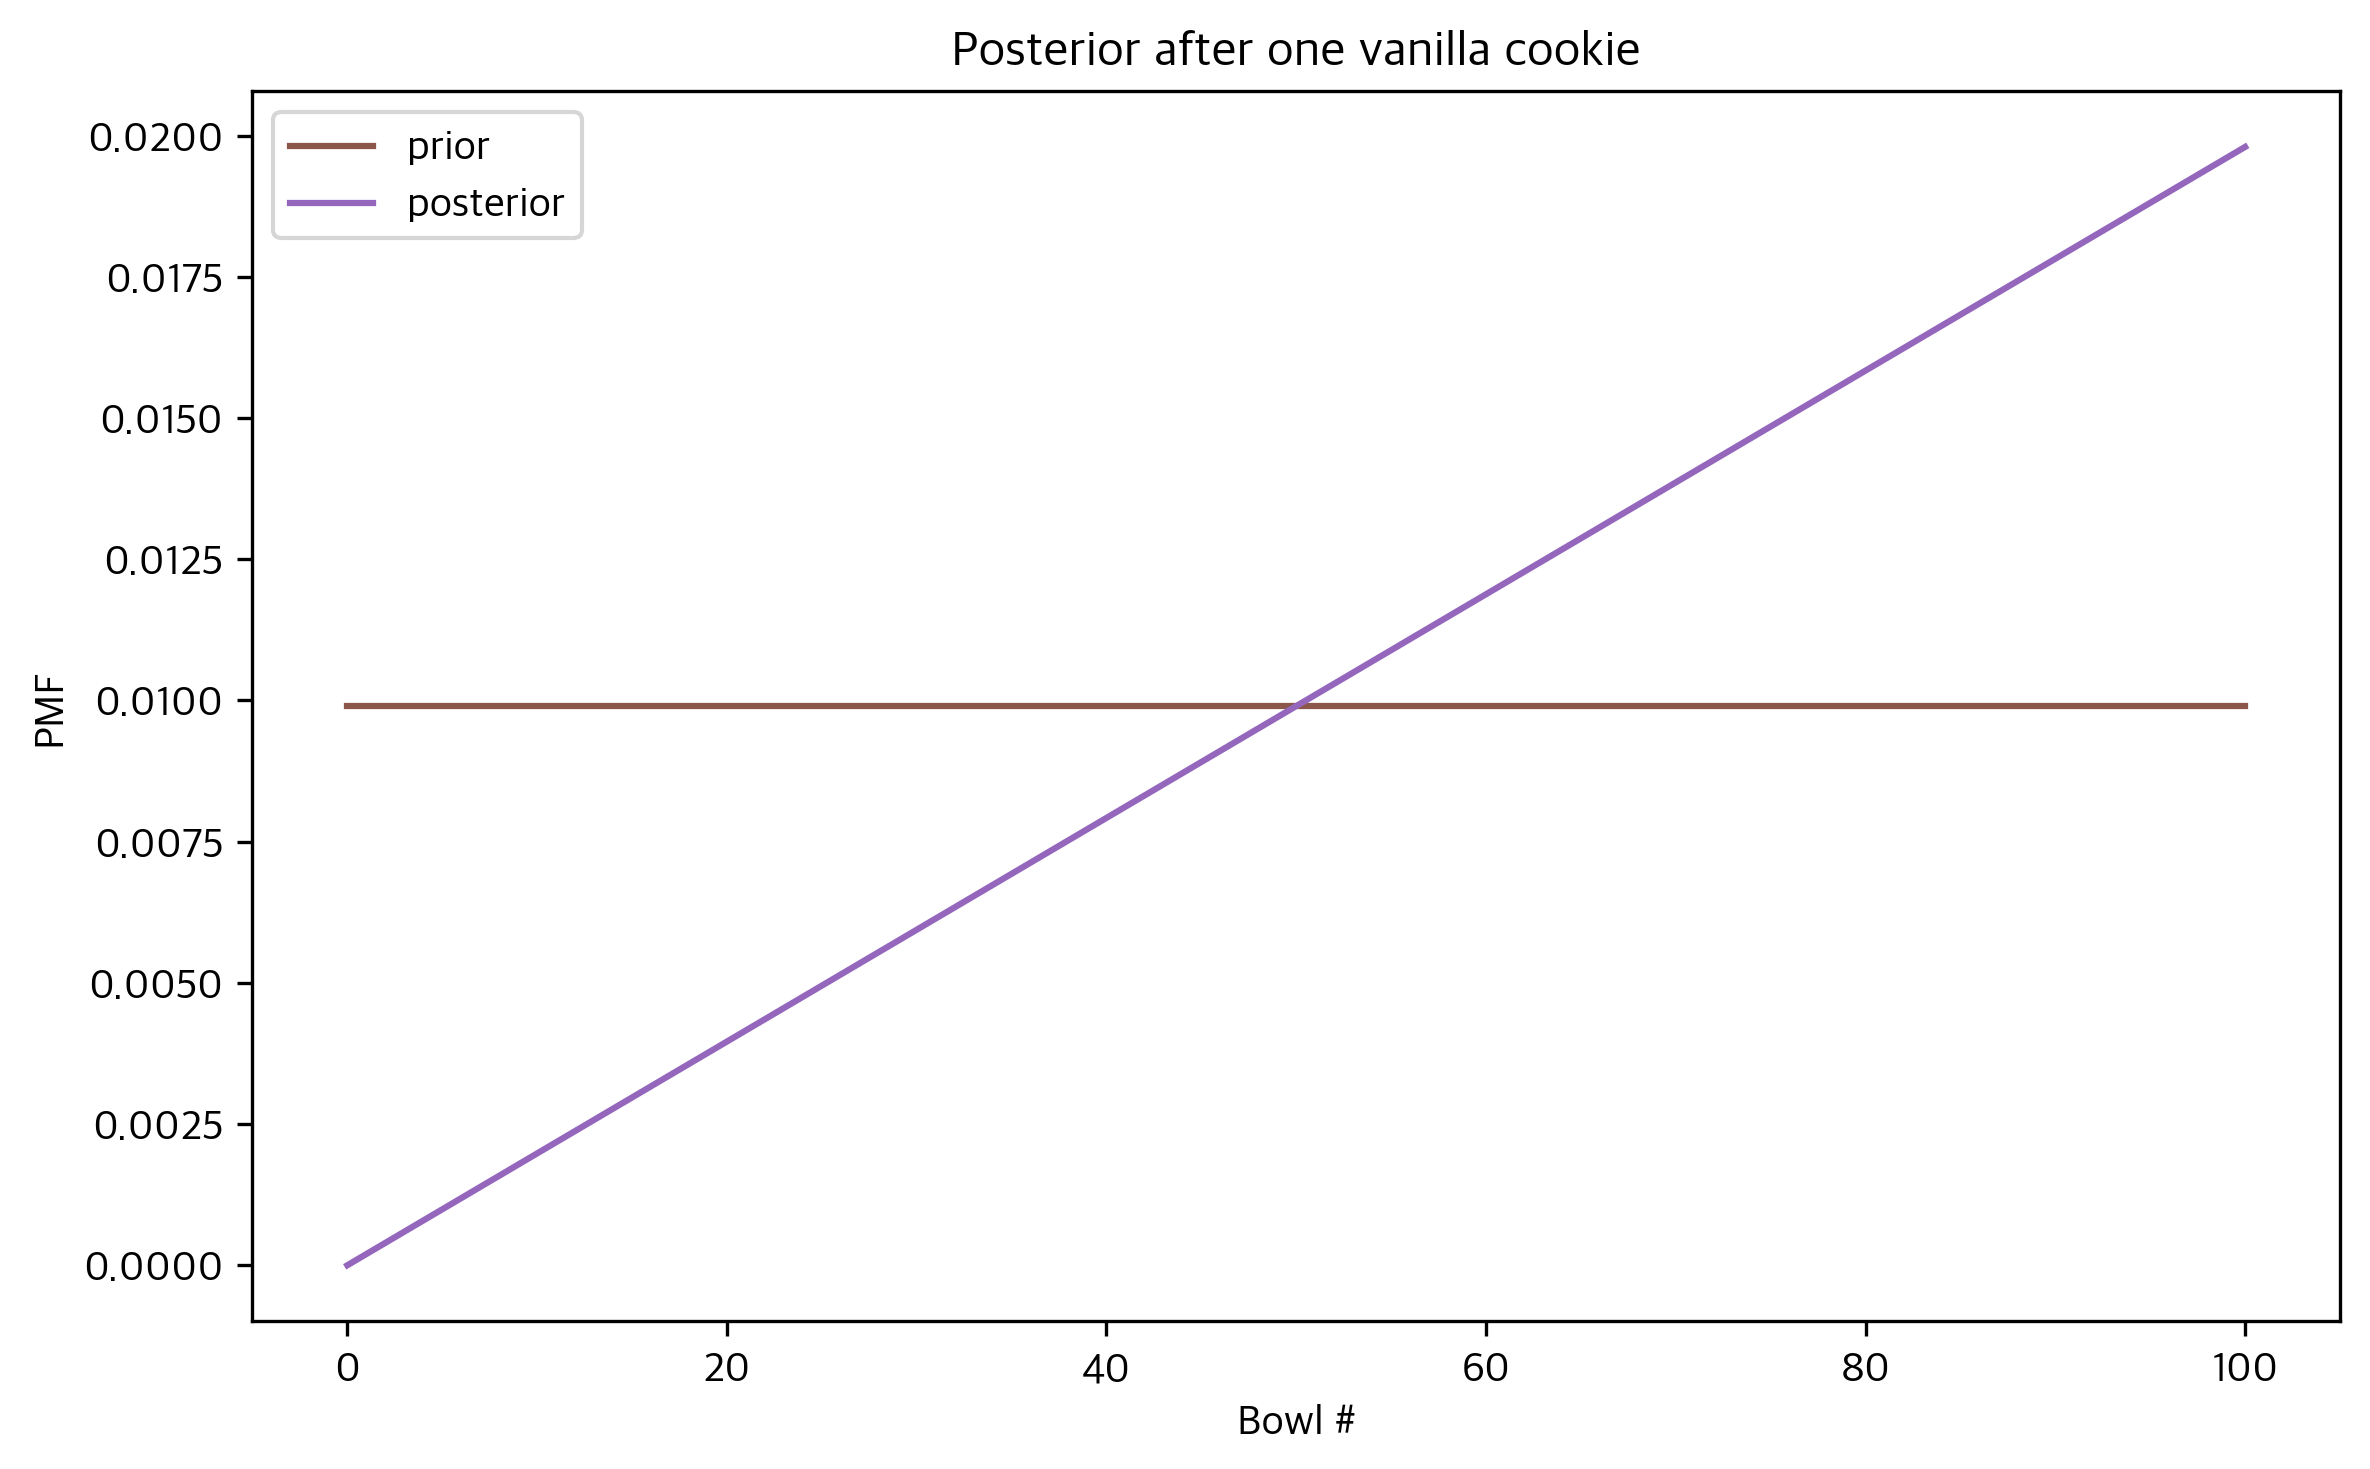

In [23]:
prior.plot(label='prior', color='C5')
posterior1.plot(label='posterior', color='C4')
decorate_bowls('Posterior after one vanilla cookie')

0번 그릇의 사후 확률은 0입니다. 왜냐하면 이 그릇에는 바닐라 쿠키가 없기 때문입니다.
100번 그릇의 사후 확률이 가장 높습니다. 왜냐하면 이 그릇에는 바닐라 쿠키가 가장 많이 들어 있기 때문입니다.
그 사이의 사후 분포의 모양은 직선 형태인데, 이는 우도가 그릇 번호에 비례하기 때문입니다.

이제 쿠키를 다시 넣고, 같은 그릇에서 다시 하나를 뽑았다고 가정해봅시다. 그리고 또 바닐라 쿠키가 나왔습니다.
다음은 두 번째 쿠키 후의 업데이트입니다.

In [24]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()

0.6699999999999999

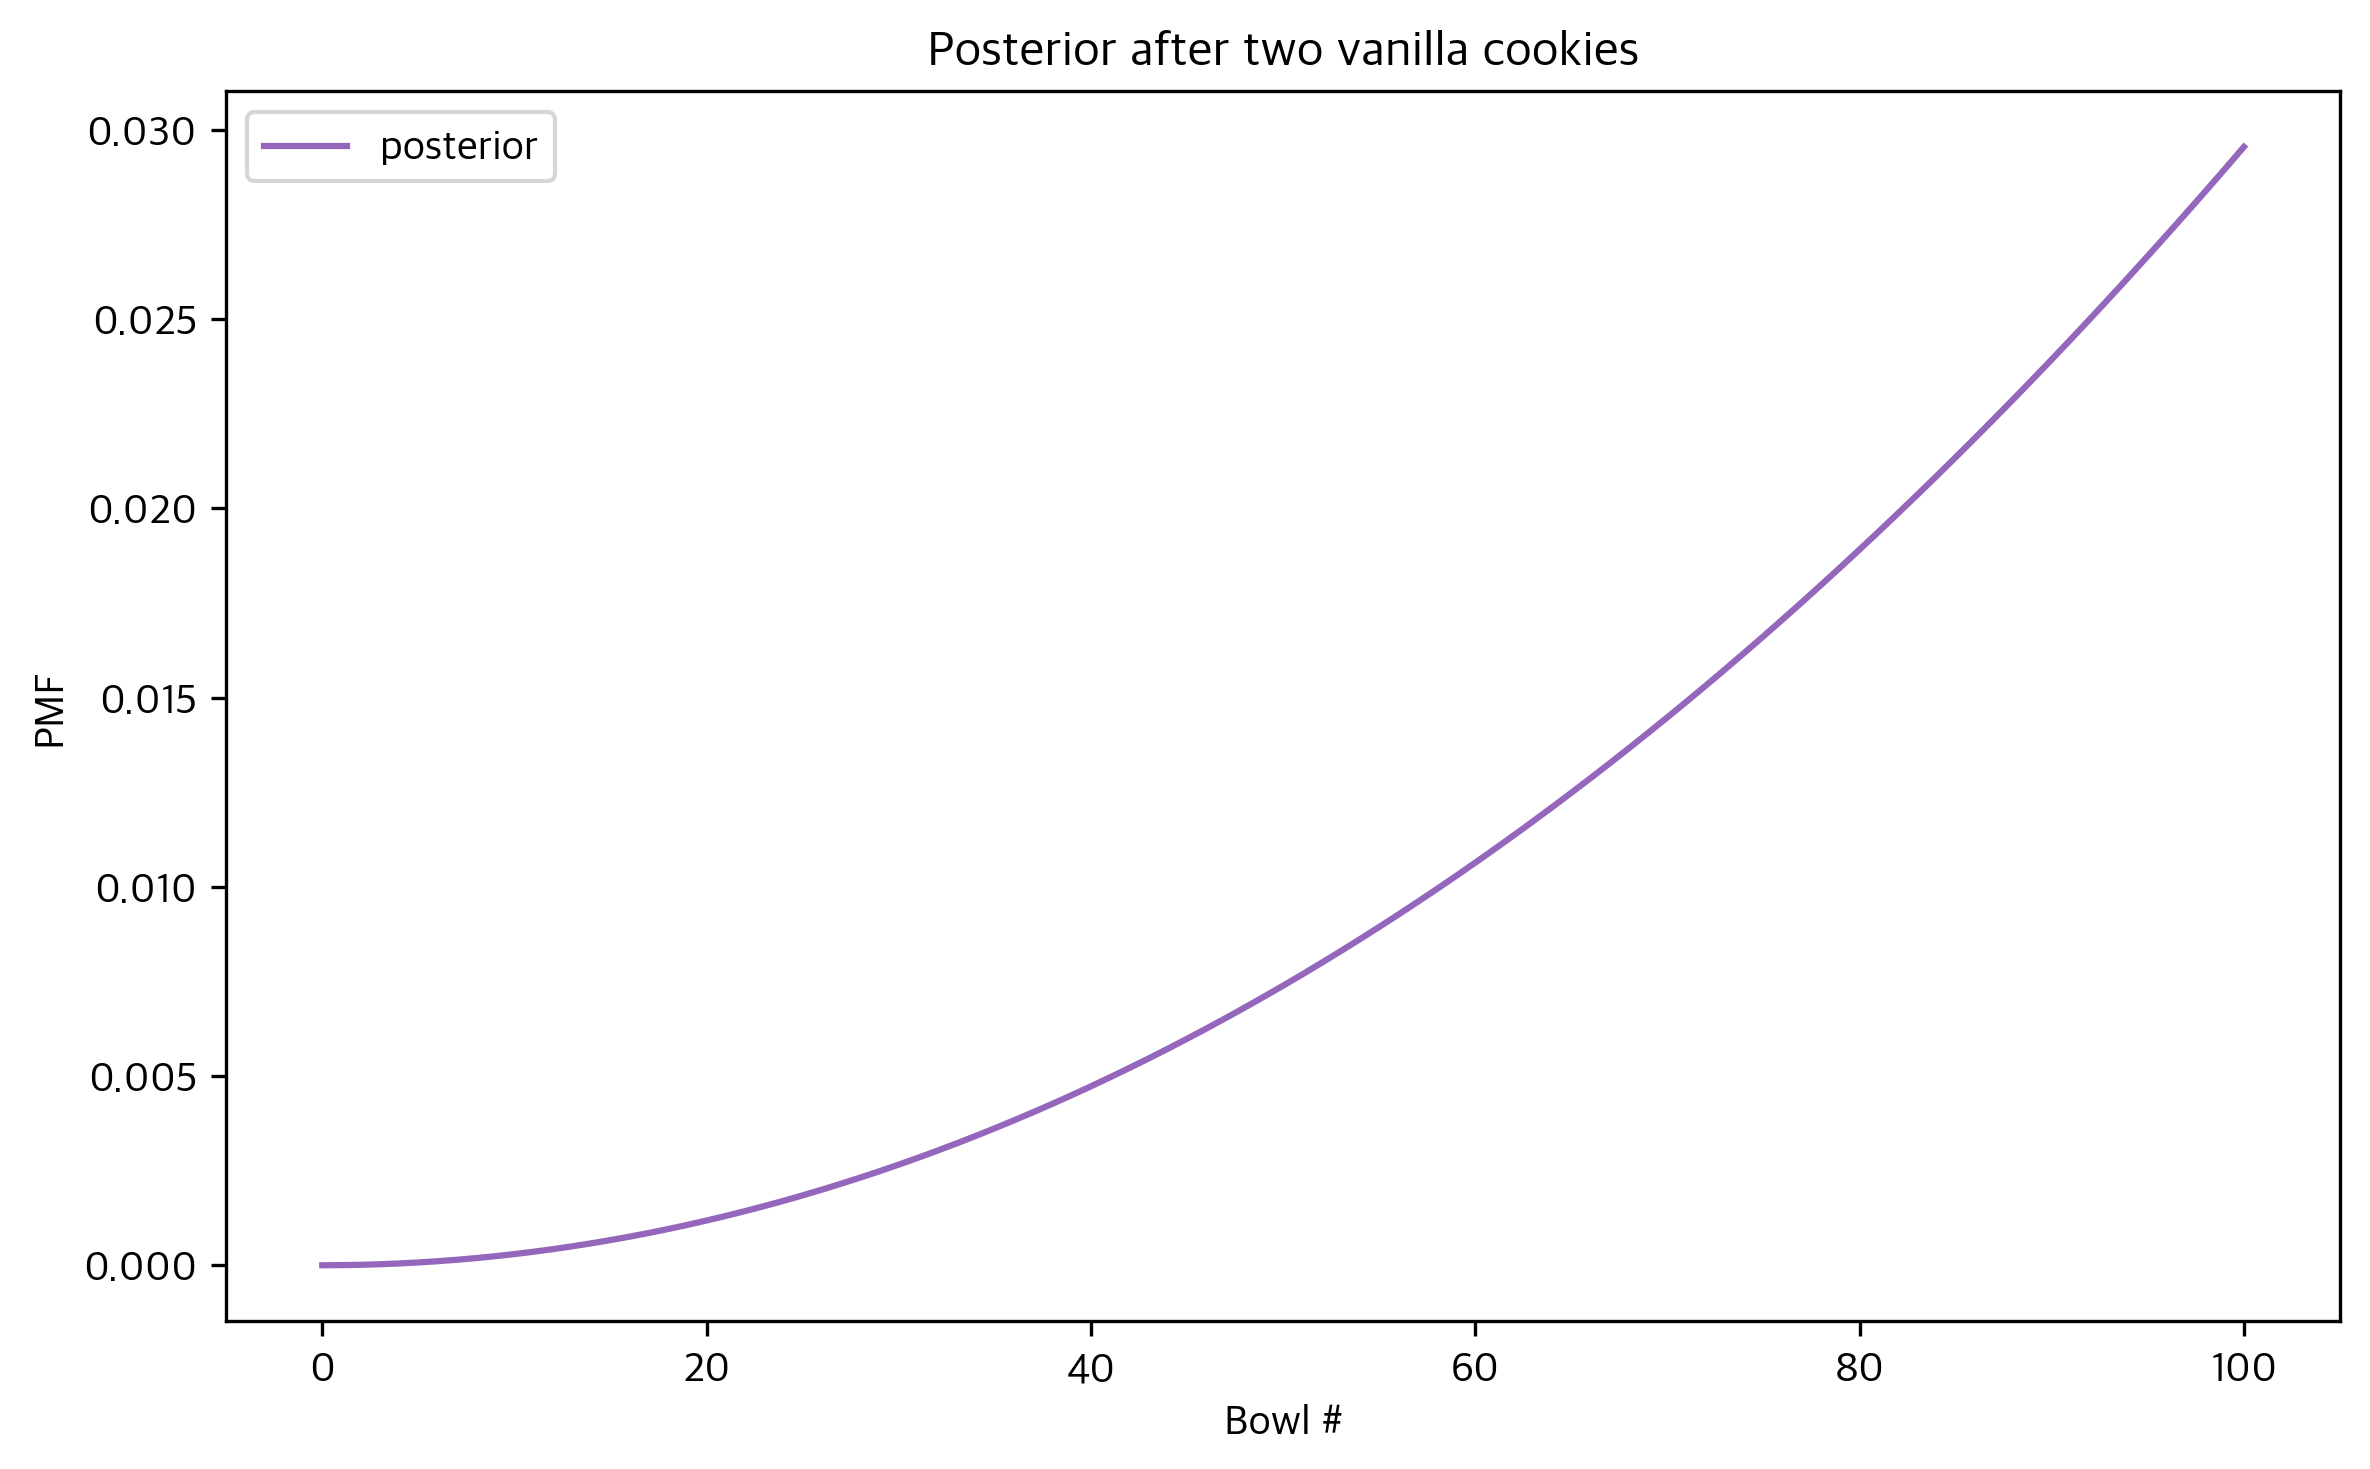

In [25]:
posterior2.plot(label='posterior', color='C4')
decorate_bowls('Posterior after two vanilla cookies')

바닐라 쿠키 두 개를 뽑은 후, 높은 번호의 그릇들이 가장 높은 사후 확률을 갖습니다. 이는 이 그릇들에 바닐라 쿠키가 가장 많이 들어 있기 때문입니다. 반면에 낮은 번호의 그릇들은 가장 낮은 확률을 가집니다.

하지만 다시 뽑았는데 이번에는 초콜릿 쿠키가 나왔다고 가정해봅시다.
다음은 업데이트된 결과입니다.

In [26]:
likelihood_chocolate = 1 - likelihood_vanilla
likelihood_chocolate

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01, 0.  ])

In [27]:
posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()


0.2462686567164179

In [28]:
posterior3

,probs
0,0.000000
1,0.000012
2,0.000047
3,0.000105
4,0.000184
...,...
96,0.004424
97,0.003388
98,0.002305
99,0.001176


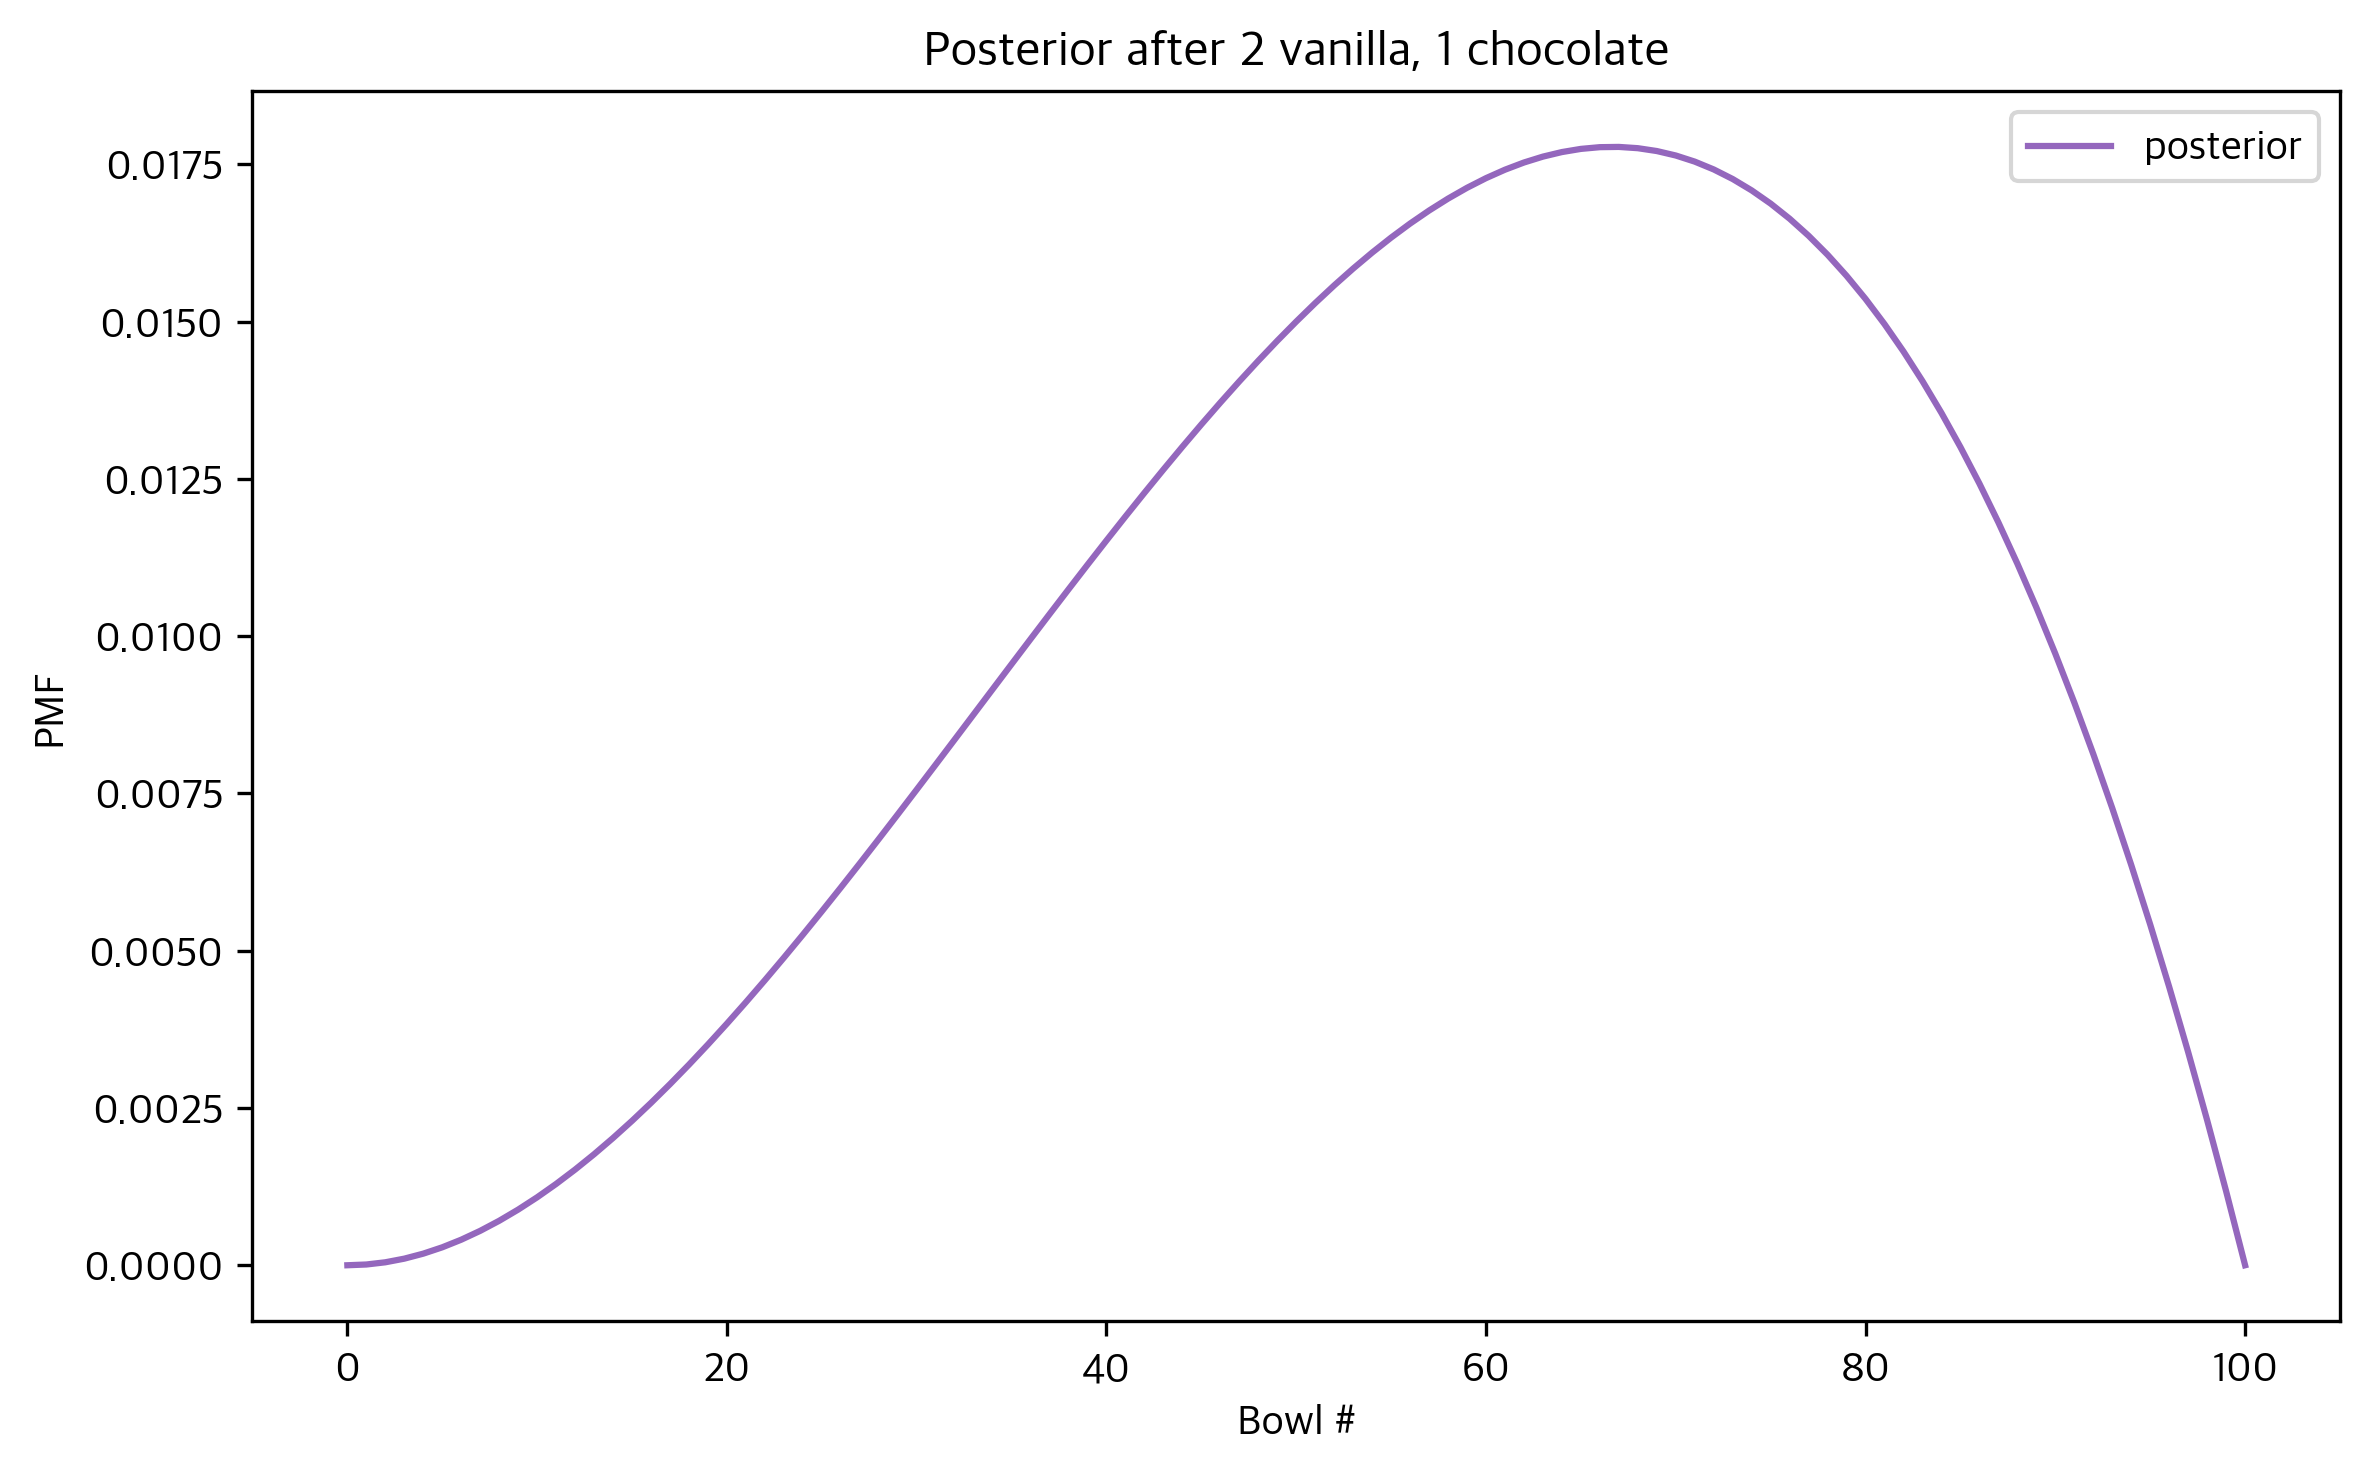

In [29]:
posterior3.plot(label='posterior', color='C4')
decorate_bowls('Posterior after 2 vanilla, 1 chocolate')

이제 100번 그릇은 제거되었습니다. 왜냐하면 이 그릇에는 초콜릿 쿠키가 없기 때문입니다.
그러나 높은 번호의 그릇들이 여전히 낮은 번호의 그릇들보다 더 가능성이 높습니다. 왜냐하면 우리는 초콜릿 쿠키보다 바닐라 쿠키를 더 많이 보았기 때문입니다.

사실, 사후 분포의 최고점은 67번 그릇에 위치해 있습니다. 이는 우리가 관찰한 데이터에서 바닐라 쿠키의 비율인 $2/3$에 해당합니다.

사후 확률이 가장 높은 값을 MAP라고 부르며, 이는 "최대 사후 확률 (maximum a posteriori probability)"을 의미합니다. 여기서 "a posteriori"는 불필요한 라틴어로 "사후"라는 뜻입니다.

MAP을 계산하기 위해 Series 메서드인 idxmax를 사용할 수 있습니다.

In [30]:
posterior3.max_prob()

67

In [31]:
posterior3.idxmax()

67

In [32]:
posterior3.idxmin()

0

In [33]:
posterior2.max_prob()

100

이 예제가 사실은 그릇에 관한 이야기가 아니라 비율을 추정하는 문제라는 것을 짐작했을 것입니다.
쿠키가 담긴 하나의 그릇이 있다고 상상해보세요.
그 그릇에 있는 쿠키 중 바닐라 쿠키의 비율을 알지 못하지만, 그 비율이 0에서 1 사이의 어떤 값이든 똑같이 가능하다고 생각합니다.
쿠키를 세 개 뽑았을 때 두 개가 바닐라 쿠키라면, 그릇에 있는 쿠키 중 어느 정도가 바닐라 쿠키일 것 같나요?
방금 계산한 사후 분포가 바로 이 질문에 대한 답입니다.

다음 장에서 비율 추정에 대해 다시 다루겠습니다.
하지만 먼저 Pmf를 사용하여 주사위 문제를 해결해 봅시다.

## 주사위 문제

이전 장에서 베이즈 테이블을 사용하여 주사위 문제를 해결했습니다.  
문제는 다음과 같습니다:

> 나는 6면체 주사위, 8면체 주사위, 그리고 12면체 주사위가 들어 있는 상자를 가지고 있다고 가정해 봅시다.
> 나는 이 주사위 중 하나를 무작위로 선택해 굴린 후, 결과가 1이라고 보고했습니다.
> 내가 선택한 주사위가 6면체 주사위일 확률은 얼마일까요?

`Pmf`를 사용하여 이 문제를 해결해 보겠습니다.  
가설을 정수로 표현하겠습니다.

In [34]:
hypos = [6, 8, 12]

사전분포

In [35]:
prior = Pmf(1, hypos)
prior.normalize()
prior

,probs
6,0.333333
8,0.333333
12,0.333333


이전 예제와 마찬가지로, 사전 확률은 모든 가설에 전파됩니다.
Pmf 객체에는 두 개의 속성이 있습니다:

qs는 분포의 수량(quantities)을 포함합니다.
ps는 해당 확률을 포함합니다.

In [36]:
prior.qs

array([ 6,  8, 12])

In [37]:
prior.ps

array([0.33333333, 0.33333333, 0.33333333])

랜덤하게 뽑았을 경우 1이 나왔을때 가능도

In [38]:
likelihood1 = 1/prior.qs
likelihood1

array([0.16666667, 0.125     , 0.08333333])

업데이트 하면

In [39]:
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


6면체 주사위에 대한 사후 확률은 $4/9$입니다.

이제 같은 주사위를 다시 굴렸더니 7이 나왔다고 가정해봅시다.
우도는 다음과 같습니다.

7을 뽑았을때 가능도

In [40]:
likelihood2 = 1/prior.qs
likelihood2[0] = 0 # 7이 나올 수 없음
likelihood2

array([0.        , 0.125     , 0.08333333])

In [41]:
posterior *= likelihood2
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


1과 7을 굴린 후, 8면체 주사위에 대한 사후 확률은 약 69%입니다.

## 주사위 업데이트

In [42]:
def update_dice(pmf, data):
    hypos = pmf.qs
    likelihood = 1/hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [43]:
pmf = prior.copy()
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692


## 연습문제


**Exercise:** Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.
I choose one of the dice at random, roll it four times, and get 1, 3, 5, and 7.
What is the probability that I chose the 8-sided die?

You can use the `update_dice` function or do the update yourself.

In [44]:
pmf = prior.copy()
update_dice(pmf, 1)
update_dice(pmf, 3)
update_dice(pmf, 5)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.835052
12,0.164948


**Exercise:** In the previous version of the dice problem, the prior probabilities are the same because the box contains one of each die.
But suppose the box contains 1 die that is 4-sided, 2 dice that are 6-sided, 3 dice that are 8-sided, 4 dice that are 12-sided, and 5 dice that are 20-sided.
I choose a die, roll it, and get a 7.
What is the probability that I chose an 8-sided die?

Hint: To make the prior distribution, call `Pmf` with two parameters.

In [45]:
dice = Pmf([1/15, 2/15, 3/15, 4/15, 5/15], [4, 6, 8, 12, 20])
dice

,probs
4,0.066667
6,0.133333
8,0.200000
12,0.266667
20,0.333333


In [46]:
update_dice(dice, 7)
dice

,probs
4,0.000000
6,0.000000
8,0.391304
12,0.347826
20,0.260870


**Exercise:** Suppose I have two sock drawers.
One contains equal numbers of black and white socks.
The other contains equal numbers of red, green, and blue socks.
Suppose I choose a drawer at random, choose two socks at random, and I tell you that I got a matching pair.
What is the probability that the socks are white?

For simplicity, let's assume that there are so many socks in both drawers that removing one sock makes a negligible change to the proportions.

In [47]:
socks = Pmf.from_seq(['blackwhite', 'redgreenblue'])
likelihood = [1/2, 1/3] # 짝이 맞게 나오는 경우
socks *= likelihood
socks.normalize()
socks

,probs
blackwhite,0.6
redgreenblue,0.4


In [48]:
white = socks['blackwhite'] / 2 # blackwhite를 뽑았을 때 흰색
white

0.30000000000000004

**Exercise:** Here's a problem from [Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/):

> Elvis Presley had a twin brother (who died at birth). What is the probability that Elvis was an identical twin?

Hint: In 1935, about 2/3 of twins were fraternal and 1/3 were identical.

In [49]:
elvis = Pmf([1/3, 2/3], ['I', 'F'])
elvis

,probs
I,0.333333
F,0.666667


In [50]:
likelihood = 1, 1/2 # 형제이므로 일란성 확률 1, 이란성 확률 1/2
elvis *= likelihood
elvis.normalize()
elvis

,probs
I,0.5
F,0.5
